# <center> [Adult salaries](https://archive.ics.uci.edu/ml/datasets/adult): EDA
### <center>Predict whether income exceeds $50K/yr based on census data.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt

# Leer CSV

In [9]:
!wget -P ./../data/ https://raw.githubusercontent.com/pbonillor/DATA_SCIENCE_CON_PYTHON/main/MODULO_II/adult.csv

--2023-10-21 02:33:26--  https://raw.githubusercontent.com/pbonillor/DATA_SCIENCE_CON_PYTHON/main/MODULO_II/adult.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5277526 (5.0M) [text/plain]
Saving to: ‘./../data/adult.csv’

adult.csv           100%[===================>]   5.03M  --.-KB/s    in 0.05s   

2023-10-21 02:33:27 (91.9 MB/s) - ‘./../data/adult.csv’ saved [5277526/5277526]



In [10]:
df = pd.read_csv("../../data/adult.csv")
print(df.shape)
df.head()

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Tipos de variables

In [12]:
cat  = df.select_dtypes(include=[object]).columns
num  = df.select_dtypes(exclude=[object, 'datetime64','timedelta64']).columns
time = df.select_dtypes(include=['datetime64']).columns

print("\nNumerical features:\n", num.values)
print("\nCategorical features:\n", cat.values)
print("\nDate/time features:\n", time.values)


Numerical features:
 ['age' 'fnlwgt' 'educational-num' 'capital-gain' 'capital-loss'
 'hours-per-week']

Categorical features:
 ['workclass' 'education' 'marital-status' 'occupation' 'relationship'
 'race' 'gender' 'native-country' 'income']

Date/time features:
 []


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [14]:
df.describe(include=['object', 'bool']).T

,count,unique,top,freq
workclass,48842,9,Private,33906
education,48842,16,HS-grad,15784
marital-status,48842,7,Married-civ-spouse,22379
occupation,48842,15,Prof-specialty,6172
relationship,48842,6,Husband,19716
race,48842,5,White,41762
gender,48842,2,Male,32650
native-country,48842,42,United-States,43832
income,48842,2,<=50K,37155


# <center> Univariate analysis

In [15]:
# Variables numericas
def plot_num(variable, title="", size=(16,4), zeros=True):
    if not zeros:
        variable=variable[variable!=0]
        title += " (no zeros)"
    plt.figure(figsize=size)
    sb.violinplot(x=variable, cut=0, palette="Set3", inner="quart" )
    sb.stripplot(x=variable, color="grey", alpha=.5).set_title(title, fontsize=20);

# Variables ordinales
def plot_ord(variable, title="", size=(16,4), zeros=True):
    if not zeros:
        variable=variable[variable!=0]
        title += " (no zeros)"
    plt.figure(figsize=size)
    sb.countplot(x=variable, color='royalblue').set_title(title, fontsize=20);

# Variables categoricas
def plot_cat(variable, title="", size=(16,4)):
    plt.figure(figsize=size)
    sb.countplot(y=variable, order=variable.value_counts().index).set_title(title, fontsize=20);

# Variables numéricas (números con decinales)

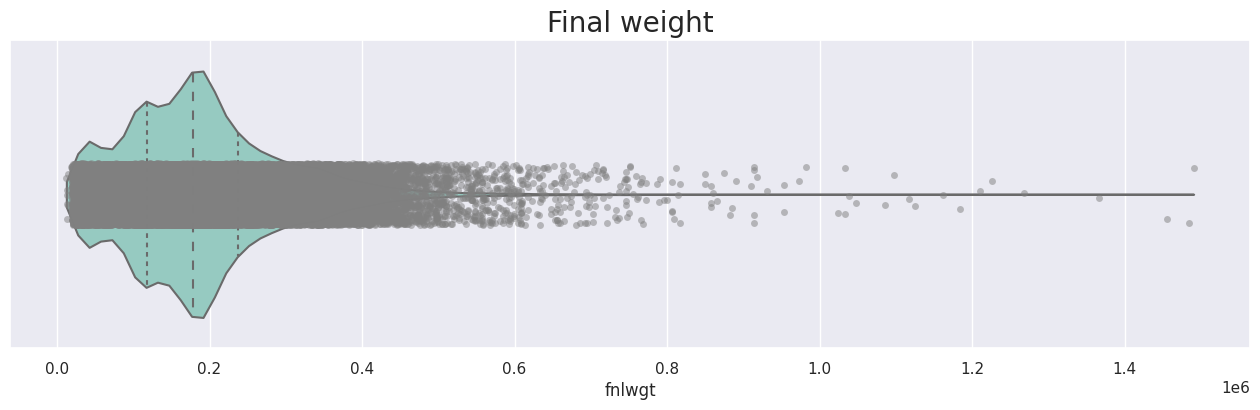

In [16]:
plot_num(df.fnlwgt, "Final weight")

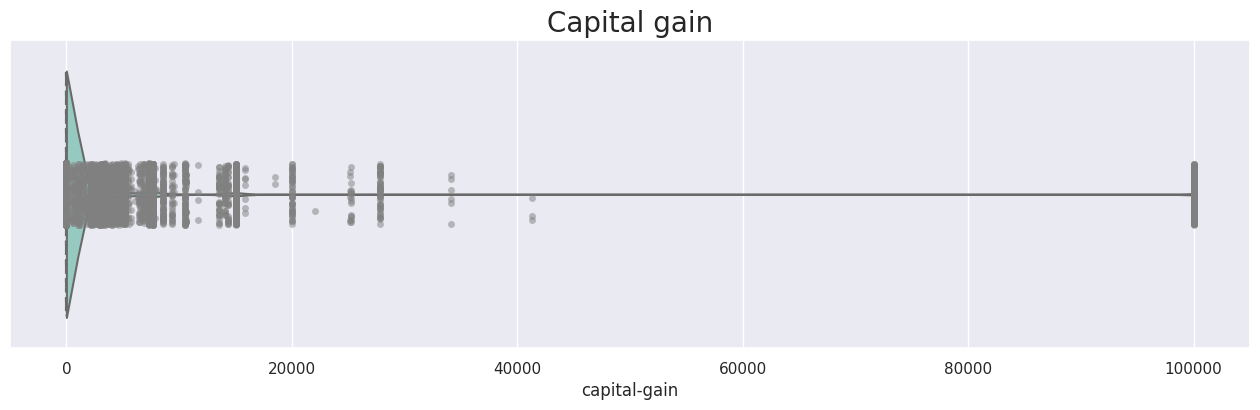

In [17]:
plot_num(df["capital-gain"], "Capital gain")

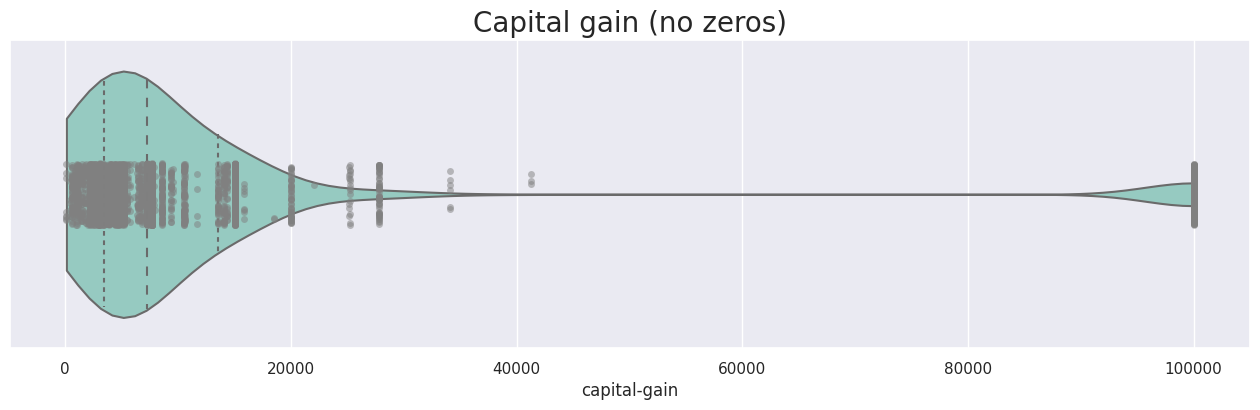

In [18]:
plot_num(df["capital-gain"], "Capital gain", zeros=False)

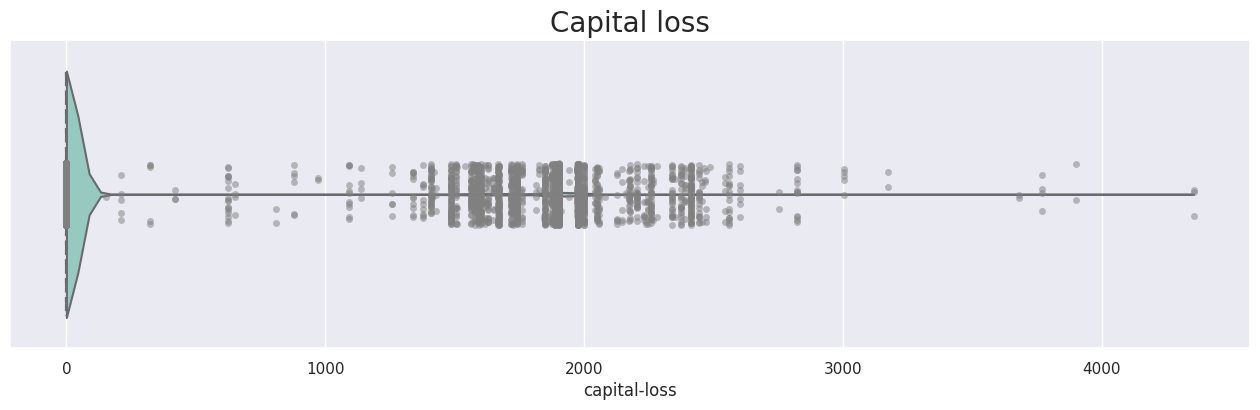

In [19]:
plot_num(df["capital-loss"], "Capital loss")

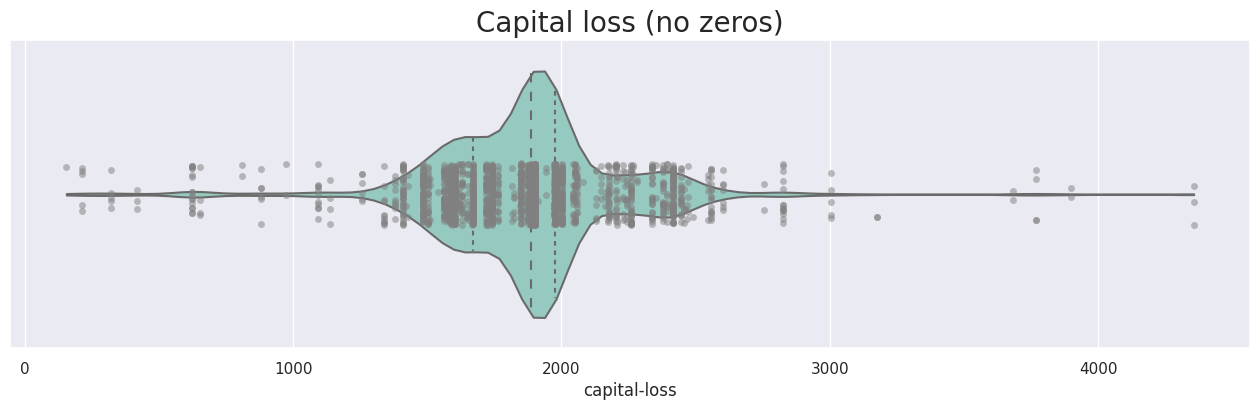

In [20]:
plot_num(df["capital-loss"], "Capital loss", zeros=False)

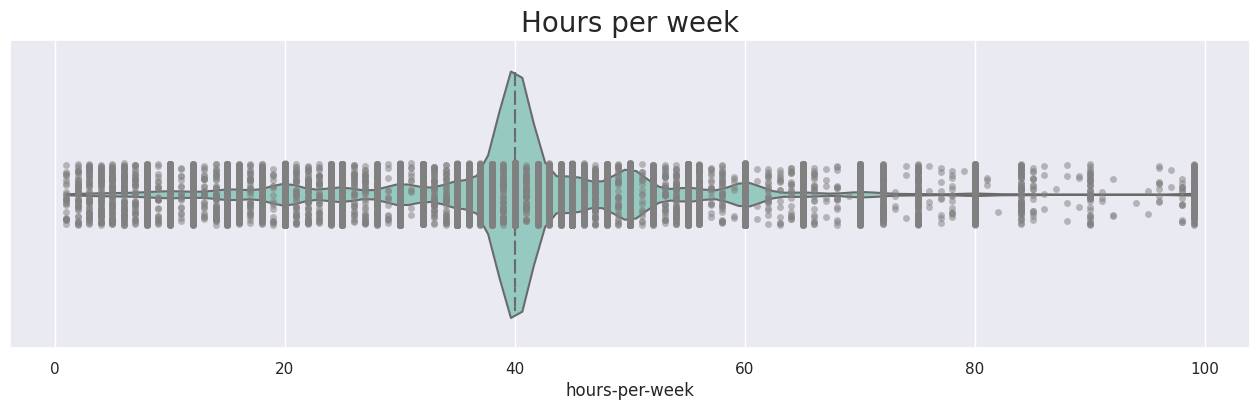

In [21]:
plot_num(df["hours-per-week"], "Hours per week")

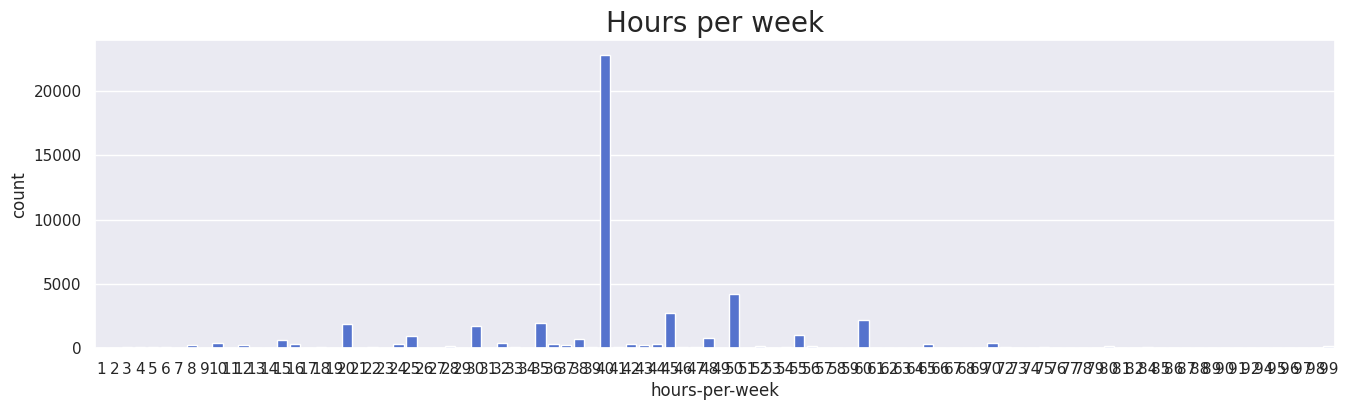

In [22]:
plot_ord(df["hours-per-week"], "Hours per week")

# Variables ordinales (números enteros)

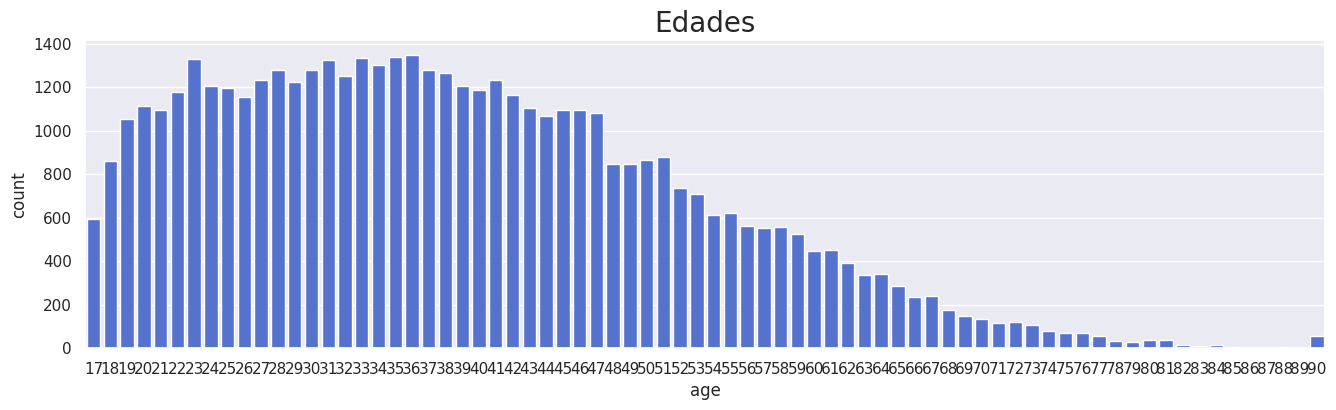

In [23]:
plot_ord(df.age, "Edades")

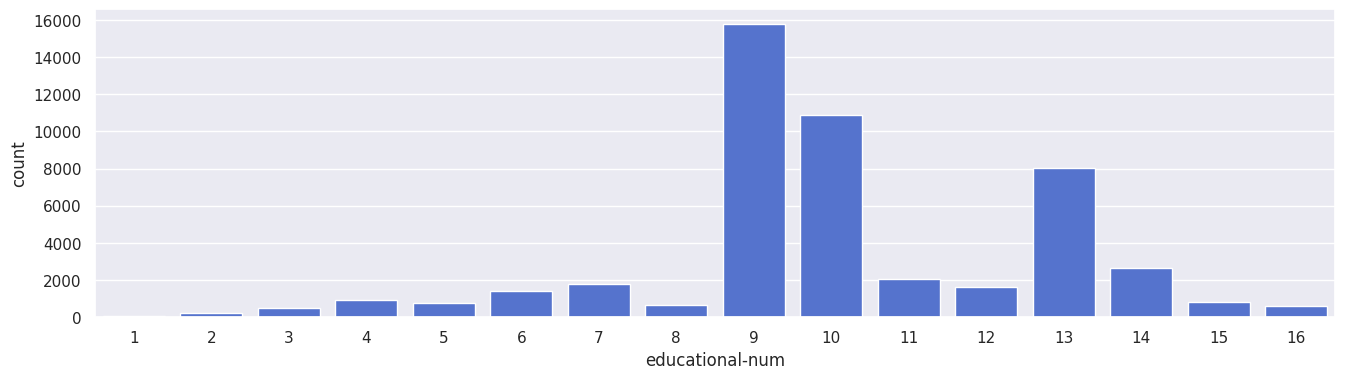

In [24]:
plot_ord(df["educational-num"])

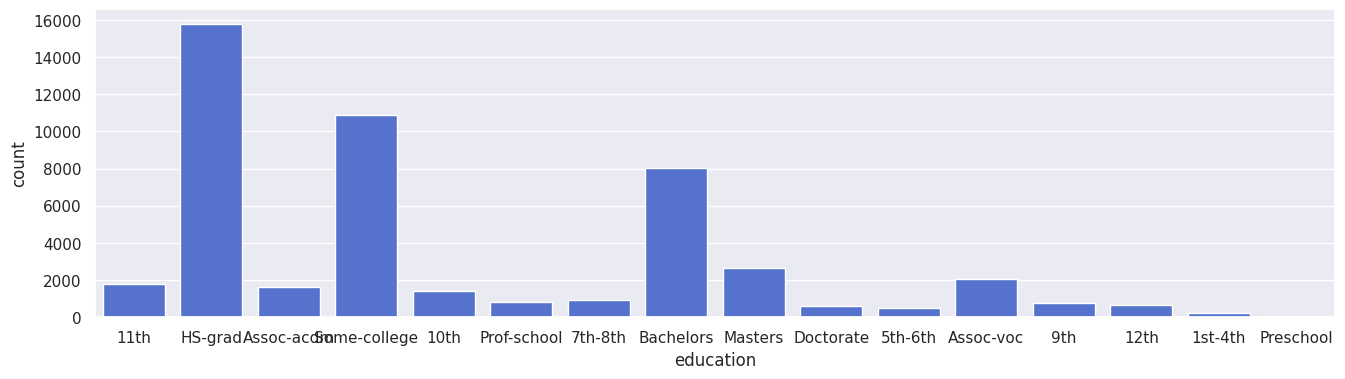

In [25]:
plot_ord(df["education"])

# Variables nominales (categorías)

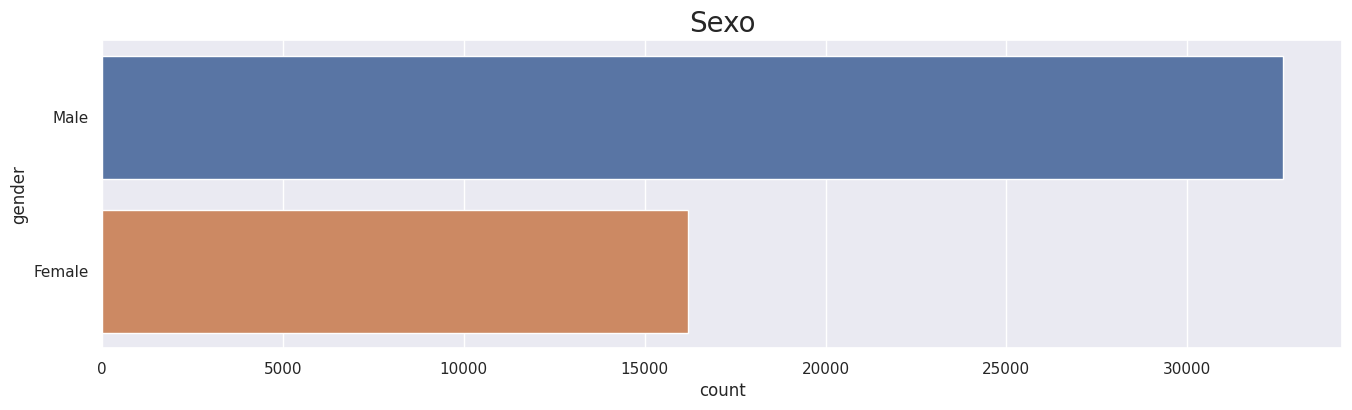

In [26]:
plot_cat(df["gender"], "Sexo")

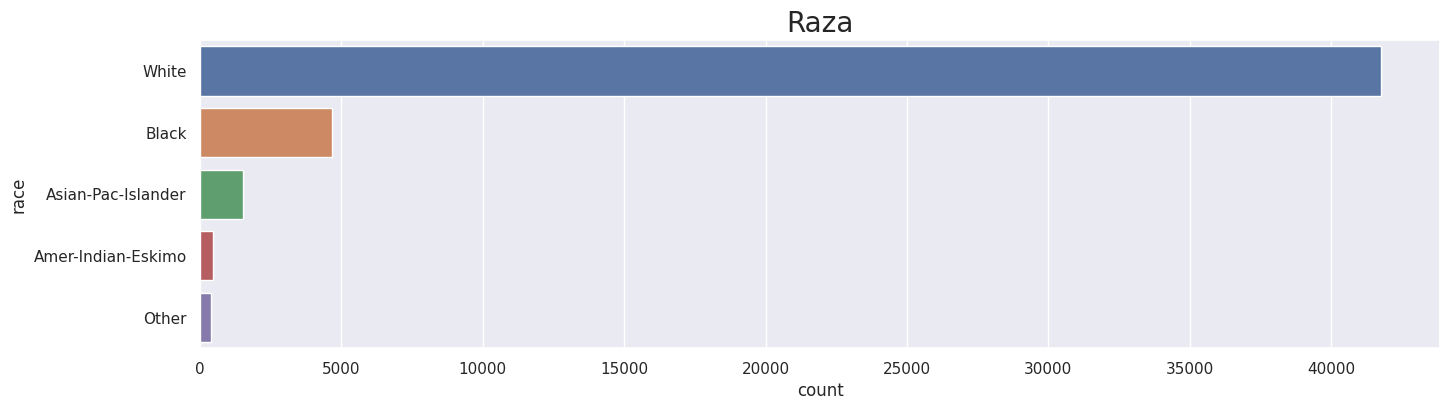

In [27]:
plot_cat(df["race"], "Raza")

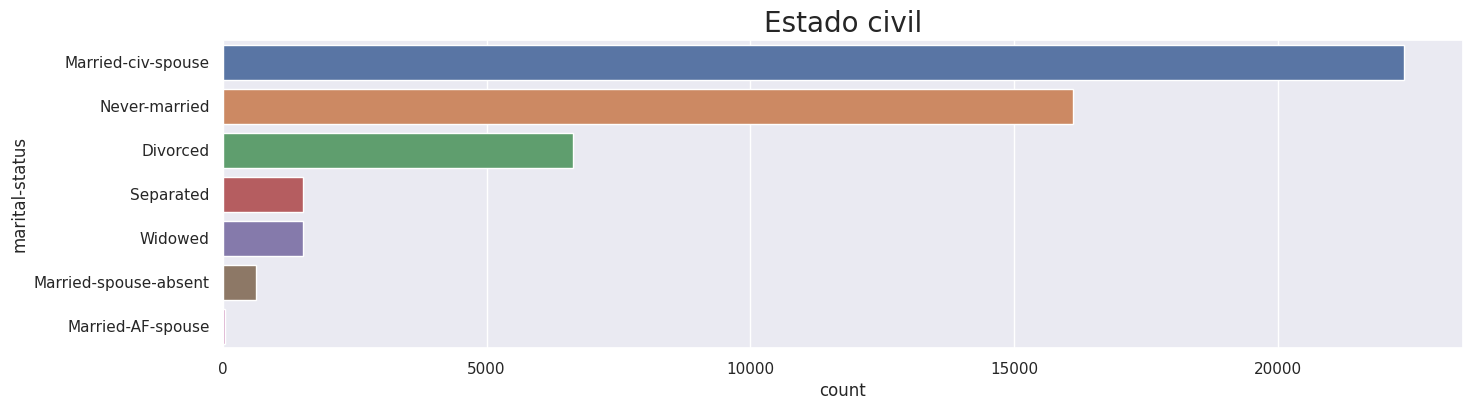

In [28]:
plot_cat(df["marital-status"], "Estado civil")

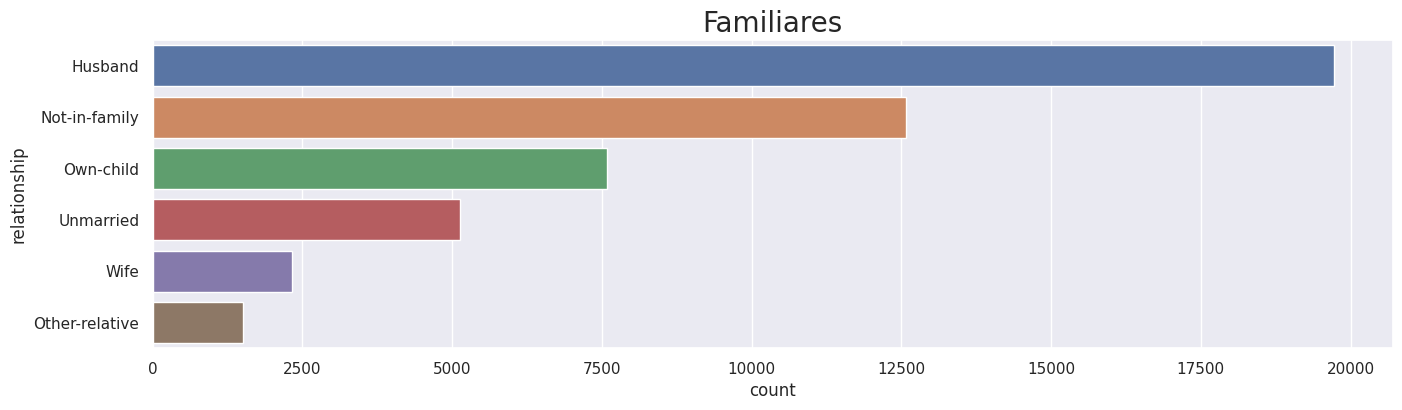

In [29]:
plot_cat(df["relationship"], "Familiares")

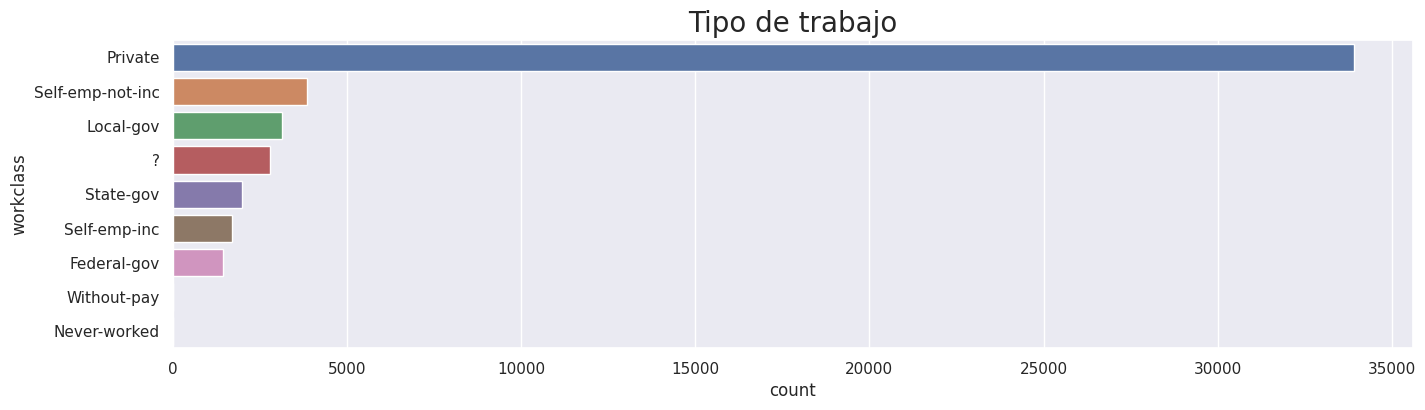

In [30]:
plot_cat(df["workclass"], "Tipo de trabajo")

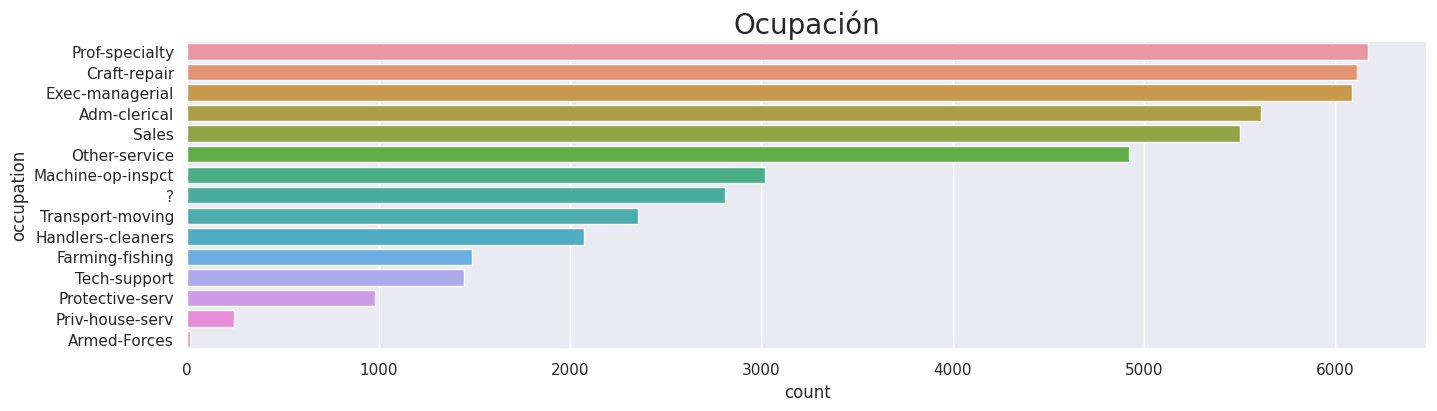

In [31]:
plot_cat(df["occupation"], "Ocupación")

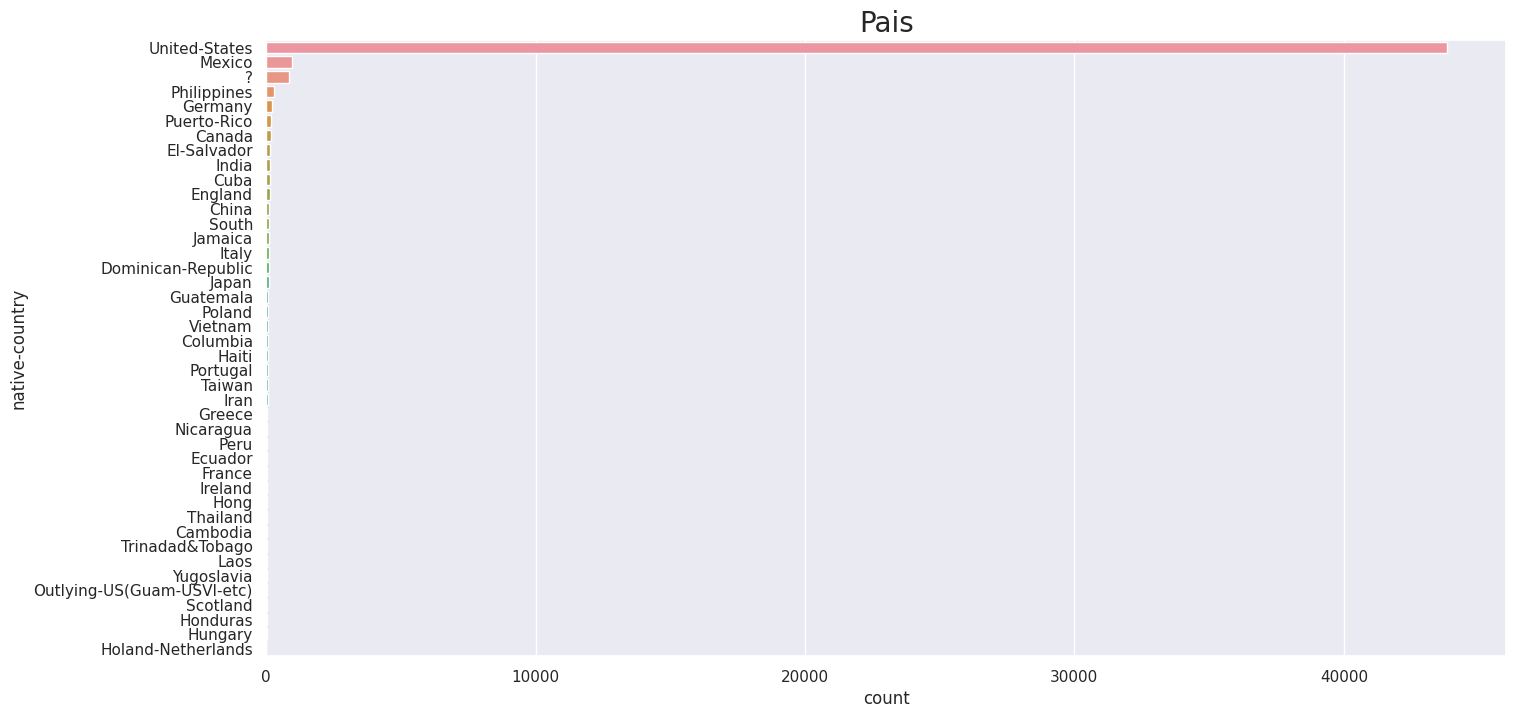

In [32]:
plot_cat(df["native-country"], "Pais", size=(16,8))

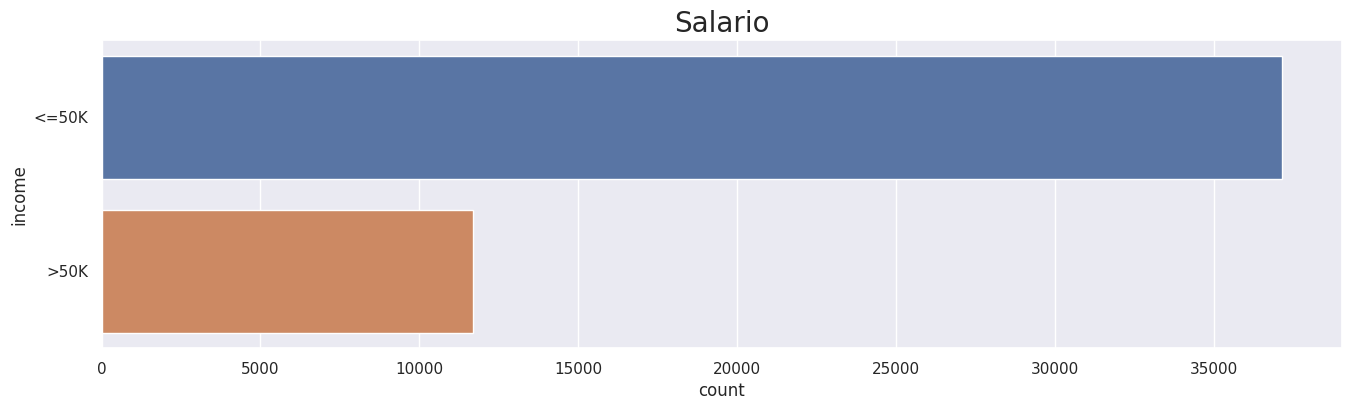

In [33]:
plot_cat(df["income"], "Salario")

# Pairplot

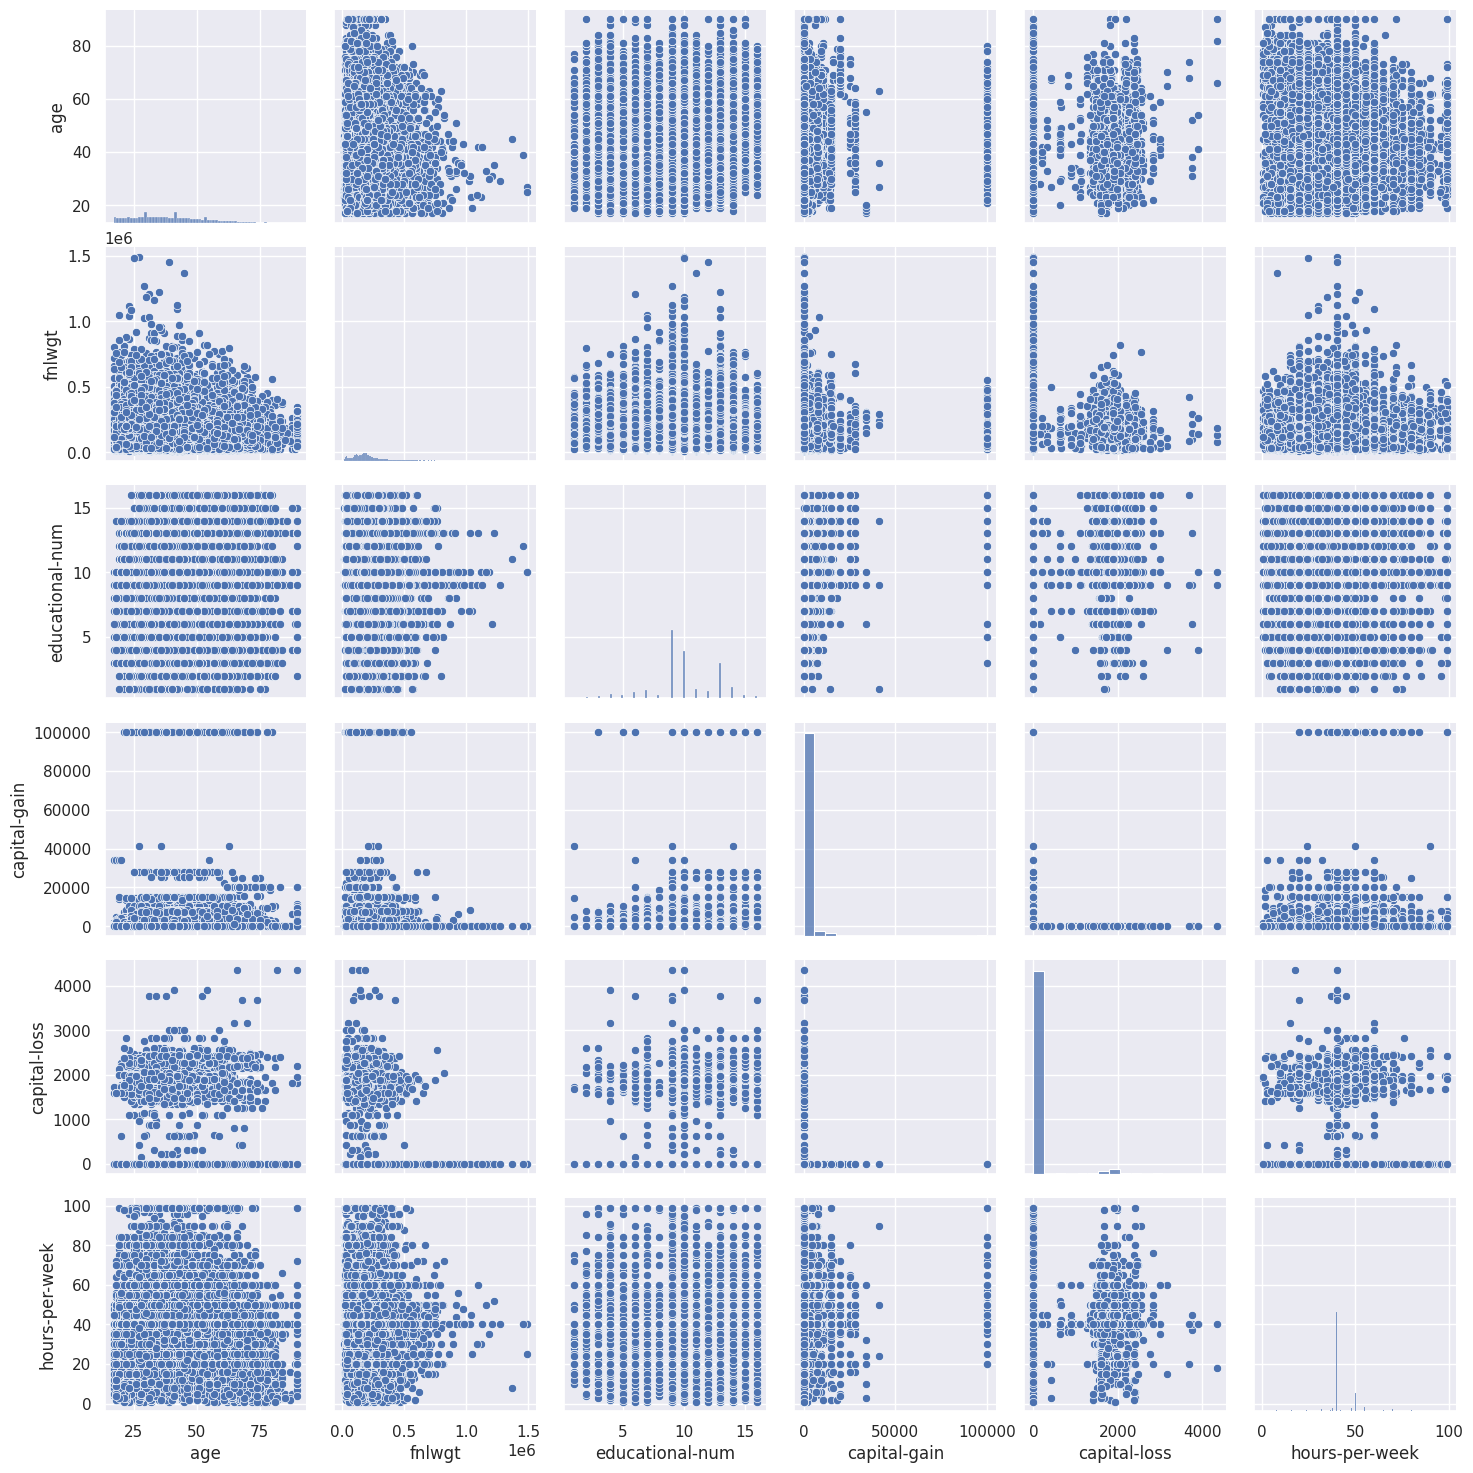

In [34]:
sb.pairplot(df);

# Pairplot en funcion de la variable a predecir

# Variable types

In [35]:
cat  = df.select_dtypes(include=[object]).columns
num  = df.select_dtypes(exclude=[object, 'datetime64','timedelta64']).columns
time = df.select_dtypes(include=['datetime64']).columns

print("Numerical features:  ", len(num))
print("Categorical features:", len(cat))
print("Date/time features:  ", len(time))

Numerical features:   6
Categorical features: 9
Date/time features:   0


# Cardinallity (valores distintos)

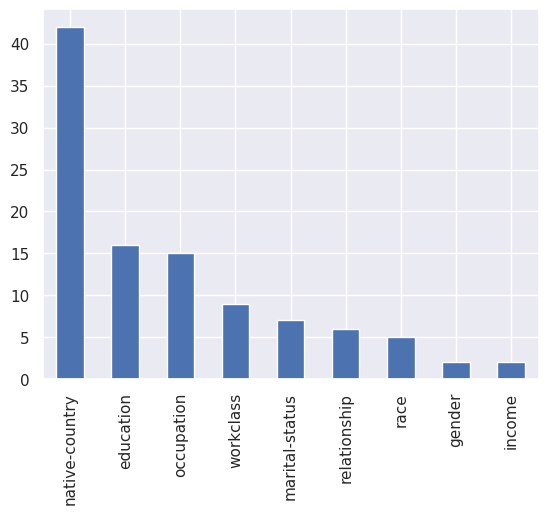

In [36]:
def plot_cardinality(df, cat):
    carinality = df[cat].nunique()
    carinality.sort_values(ascending=False, inplace=True)
    carinality.plot.bar()

plot_cardinality(df, cat)

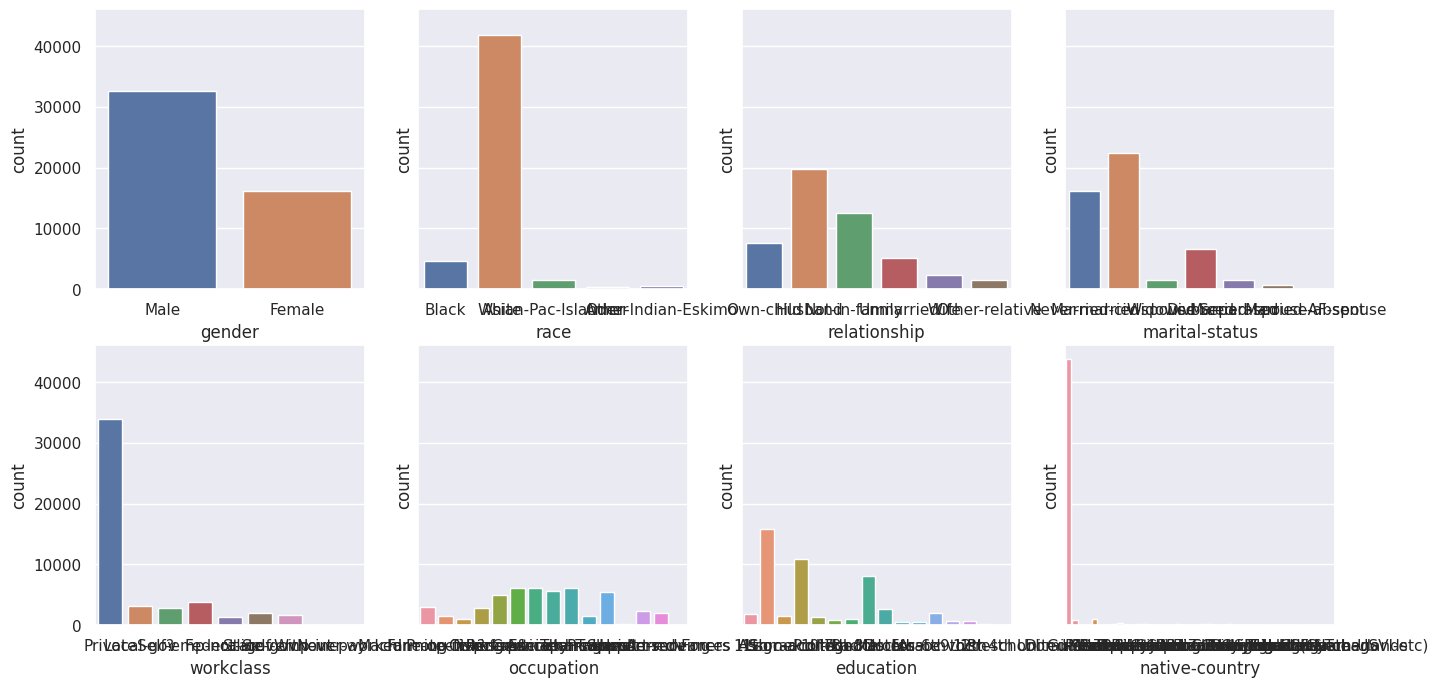

In [37]:
f, a = plt.subplots(nrows=2, ncols=4, figsize=(16, 8), sharey=True)

sb.countplot(x='gender',         data=df, ax=a[0][0]);
sb.countplot(x='race',           data=df, ax=a[0][1]);
sb.countplot(x='relationship',   data=df, ax=a[0][2]);
sb.countplot(x='marital-status', data=df, ax=a[0][3]);
sb.countplot(x='workclass',      data=df, ax=a[1][0]);
sb.countplot(x='occupation',     data=df, ax=a[1][1]);
sb.countplot(x='education',      data=df, ax=a[1][2]);
sb.countplot(x='native-country', data=df, ax=a[1][3]);

# Qué queremos predecir? -> `df.income`

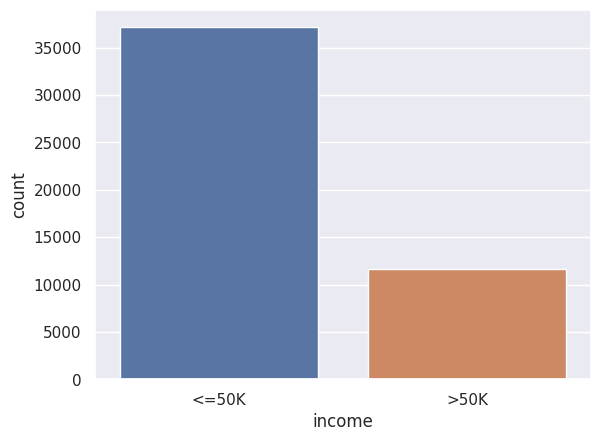

In [38]:
sb.countplot(x=df.income);

# Missings

In [39]:
df = df.replace("?", np.nan)

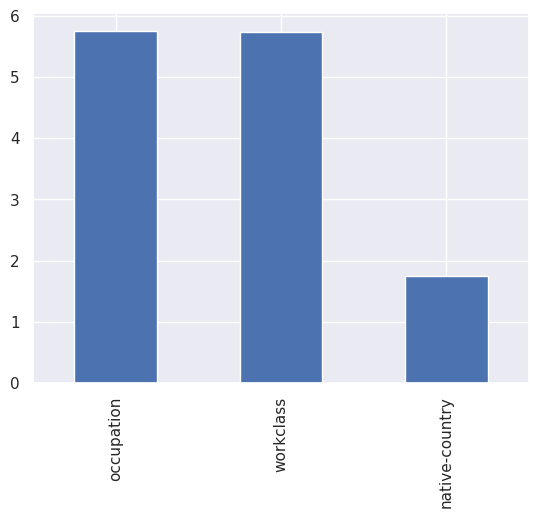

In [40]:
missing = df.isnull().sum()
missing = missing/df.isnull().count()*100
missing = missing[missing > 0]
missing.sort_values(ascending=False, inplace=True)
missing.plot.bar();

In [ ]:
#ProfileReport(df)